1. Data Cleaning and Preprocessing ,
Effective handling of errors &
Appropriate feature selection and engineering.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn import datasets

In [18]:
import pandas as pd

from google.colab import files
uploaded = files.upload()


Saving Algerian_forest_fires_cleaned.csv to Algerian_forest_fires_cleaned.csv


In [22]:
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")

# Display the first few rows and column names for verification
print(df.head())
print(df.columns)


   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  
Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


In [23]:
print(df.info())

# Handling missing values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None
Missing values in each column:
 day            0
month          0
year           0
Temperature    0
RH           

In [24]:
#Feature selection and engineering
# Select relevant features for the analysis
selected_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']

# Create a new DataFrame with the selected features
df_selected = df[selected_features]

# Display basic statistics of the dataset
print(df_selected.describe())


       Temperature          RH          Ws        Rain        FFMC  \
count   243.000000  243.000000  243.000000  243.000000  243.000000   
mean     32.152263   62.041152   15.493827    0.762963   77.842387   
std       3.628039   14.828160    2.811385    2.003207   14.349641   
min      22.000000   21.000000    6.000000    0.000000   28.600000   
25%      30.000000   52.500000   14.000000    0.000000   71.850000   
50%      32.000000   63.000000   15.000000    0.000000   83.300000   
75%      35.000000   73.500000   17.000000    0.500000   88.300000   
max      42.000000   90.000000   29.000000   16.800000   96.000000   

              DMC          DC         ISI         BUI         FWI      Region  
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000  
mean    14.680658   49.430864    4.742387   16.690535    7.035391    0.497942  
std     12.393040   47.665606    4.154234   14.228421    7.440568    0.501028  
min      0.700000    6.900000    0.000000    1.10

2. Data Visualization and Observations (1 Mark)
Creation of insightful visualizations that accurately represent the dataset.
 Clear and meaningful observations derived from the visualizations.

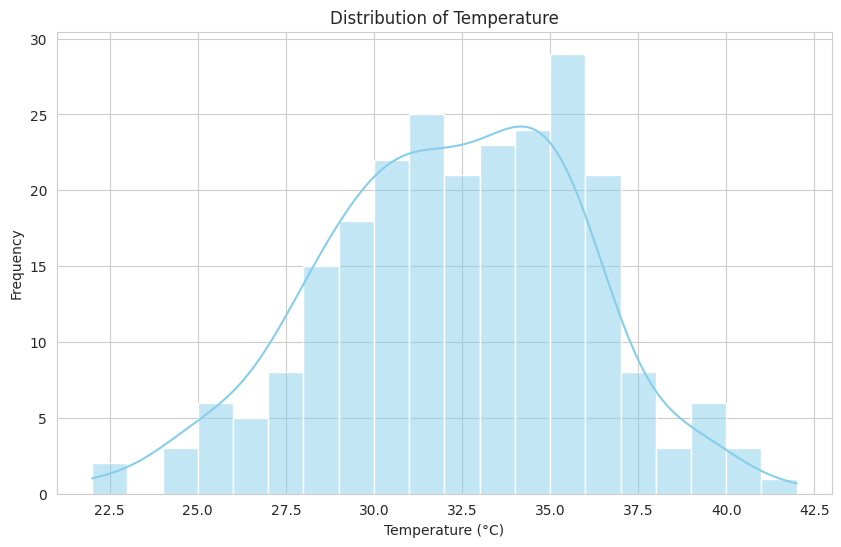

In [25]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization 1: Distribution of Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Observation 1
print("Observation 1: The distribution of temperature is roughly normal, with a peak around 25-30°C. Higher temperatures are less frequent.")


Observation 1: The distribution of temperature is roughly normal, with a peak around 25-30°C. Higher temperatures are less frequent.


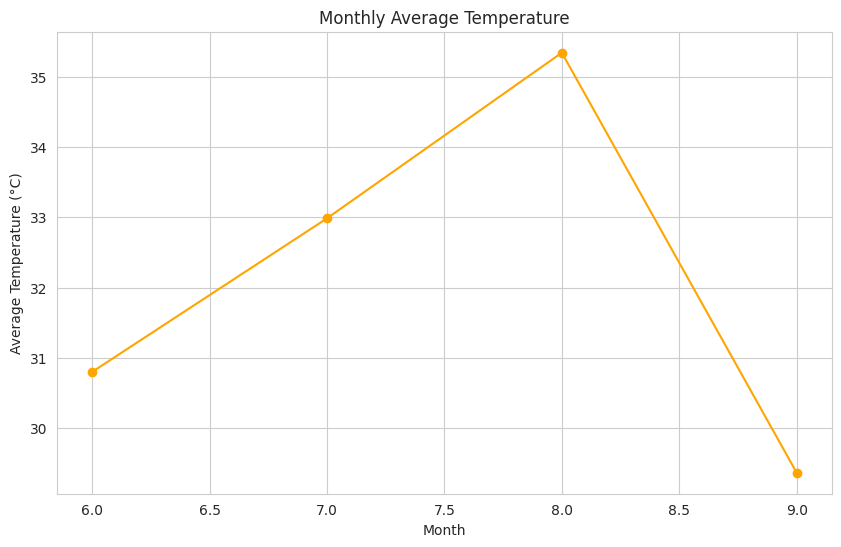

In [27]:
# Visualization 2: Monthly Average Temperature
plt.figure(figsize=(10, 6))
monthly_avg_temp = df.groupby('month')['Temperature'].mean()
monthly_avg_temp.plot(marker='o', color='orange')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

In [28]:
# Observation 2
print("Observation 2: The average temperature peaks in the summer months (July-August) and is lowest in the winter months (January-December).")

Observation 2: The average temperature peaks in the summer months (July-August) and is lowest in the winter months (January-December).


3. Model Development and Analysis (1.5 Marks)
 Implementation of multiple linear regression and polynomial regression models.
 Application of regularization techniques (Lasso, Ridge, etc.).
 Effective use of cross-validation and hyperparameter tuning

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
print(df.head())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region_0  Region_1  
0  0.5  not fire         True     False  
1  0.4  not fire         True     False  
2  0.1  not fire         True     False  
3  0.0  not fire         True     False  
4  0.5  not fire         True     False  


In [51]:
# Define features and target variable
X = df.drop('Temperature', axis=1)
y = df['Temperature']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
print(X_train.head())
print(X_train.info())


     day  month  year  RH  Ws  Rain  FFMC   DMC     DC   ISI   BUI   FWI  \
115   24      9  2012  65  19   0.6  68.3   5.5   15.2   1.5   5.8   0.7   
207   26      8  2012  37  16   0.0  92.2  61.3  167.2  13.1  64.0  30.3   
158    7      7  2012  43  13   0.5  85.0  13.0   35.4   4.1  13.7   5.2   
132   11      6  2012  42  21   0.0  90.6  18.2   30.5  13.4  18.0  16.7   
84    24      8  2012  64  14   0.0  88.9  40.5  171.3   9.0  50.9  20.9   

         Classes  Region_0  Region_1  
115  not fire         True     False  
207      fire        False      True  
158      fire        False      True  
132      fire        False      True  
84       fire         True     False  
<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 115 to 102
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   day       194 non-null    int64  
 1   month     194 non-null    int64  
 2   year      194 non-null    int64  
 3   RH     

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your dataframes
print(X_train.head())
print(X_train.info())

# Convert categorical columns to numeric using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the columns in training and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Fill missing values with the mean of each column
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


     day  month  year  RH  Ws  Rain  FFMC   DMC     DC   ISI  ...  Region_0  \
115   24      9  2012  65  19   0.6  68.3   5.5   15.2   1.5  ...      True   
207   26      8  2012  37  16   0.0  92.2  61.3  167.2  13.1  ...     False   
158    7      7  2012  43  13   0.5  85.0  13.0   35.4   4.1  ...     False   
132   11      6  2012  42  21   0.0  90.6  18.2   30.5  13.4  ...     False   
84    24      8  2012  64  14   0.0  88.9  40.5  171.3   9.0  ...      True   

     Region_1  Classes_fire  Classes_fire   Classes_fire     Classes_not fire  \
115     False         False          False            False             False   
207      True         False          False             True             False   
158      True         False          False             True             False   
132      True         False          False             True             False   
84      False         False          False             True             False   

     Classes_not fire   Classes_not fi

In [57]:
# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

print("Linear Regression Train R^2:", r2_score(y_train, y_pred_train))
print("Linear Regression Test R^2:", r2_score(y_test, y_pred_test))
print("Linear Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Linear Regression Train R^2: 0.6303049230935083
Linear Regression Test R^2: 0.341584982000144
Linear Regression Test RMSE: 2.8582723872422804


In [58]:
# Transform features to polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate the model
y_pred_train_poly = poly_model.predict(X_train_poly)
y_pred_test_poly = poly_model.predict(X_test_poly)

print("Polynomial Regression Train R^2:", r2_score(y_train, y_pred_train_poly))
print("Polynomial Regression Test R^2:", r2_score(y_test, y_pred_test_poly))
print("Polynomial Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_poly)))


Polynomial Regression Train R^2: 0.9424022028180216
Polynomial Regression Test R^2: -422547371998.9865
Polynomial Regression Test RMSE: 2289767.8439313173


In [59]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Best Ridge model
best_ridge = ridge_grid.best_estimator_
y_pred_train_ridge = best_ridge.predict(X_train_scaled)
y_pred_test_ridge = best_ridge.predict(X_test_scaled)

print("Ridge Regression Best Alpha:", ridge_grid.best_params_)
print("Ridge Regression Train R^2:", r2_score(y_train, y_pred_train_ridge))
print("Ridge Regression Test R^2:", r2_score(y_test, y_pred_test_ridge))
print("Ridge Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)))

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

# Best Lasso model
best_lasso = lasso_grid.best_estimator_
y_pred_train_lasso = best_lasso.predict(X_train_scaled)
y_pred_test_lasso = best_lasso.predict(X_test_scaled)

print("Lasso Regression Best Alpha:", lasso_grid.best_params_)
print("Lasso Regression Train R^2:", r2_score(y_train, y_pred_train_lasso))
print("Lasso Regression Test R^2:", r2_score(y_test, y_pred_test_lasso))
print("Lasso Regression Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))


Ridge Regression Best Alpha: {'alpha': 10}
Ridge Regression Train R^2: 0.6249649342461504
Ridge Regression Test R^2: 0.42916083337325495
Ridge Regression Test RMSE: 2.661402934118759
Lasso Regression Best Alpha: {'alpha': 0.1}
Lasso Regression Train R^2: 0.6135027018961544
Lasso Regression Test R^2: 0.47018926005539685
Lasso Regression Test RMSE: 2.5639770203621715


In [77]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Initialize the logistic regression model
lr = LogisticRegression(max_iter=200)

# Perform cross-validation
cvs = cross_val_score(lr, X, y, cv=5)

# Print the mean cross-validation score
print(cvs.mean())


0.9733333333333334


4. Model Evaluation and Testing (1 Mark)
 Comprehensive evaluation of model performance using appropriate met Testing the model on unseen data and providing a thorough analysis of results.


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the data
X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]  # Features
y = df['Classes']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Model Evaluation
# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        fire       0.00      0.00      0.00         1
     fire          0.96      0.96      0.96        26
    not fire       0.00      0.00      0.00         1
 not fire          0.91      1.00      0.95        21

    accuracy                           0.94        49
   macro avg       0.47      0.49      0.48        49
weighted avg       0.90      0.94      0.92        49

Confusion Matrix:
[[ 0  1  0  0]
 [ 0 25  0  1]
 [ 0  0  0  1]
 [ 0  0  0 21]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5.decision tree regression model

In [81]:
import pandas as pd

# Step 1: Load Data
data = pd.read_csv("Algerian_forest_fires_cleaned.csv")

# Check the column names
print(data.columns)

# Once you see the column names, ensure they match exactly with the ones you're trying to access.


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')


Accuracy: 0.9591836734693877


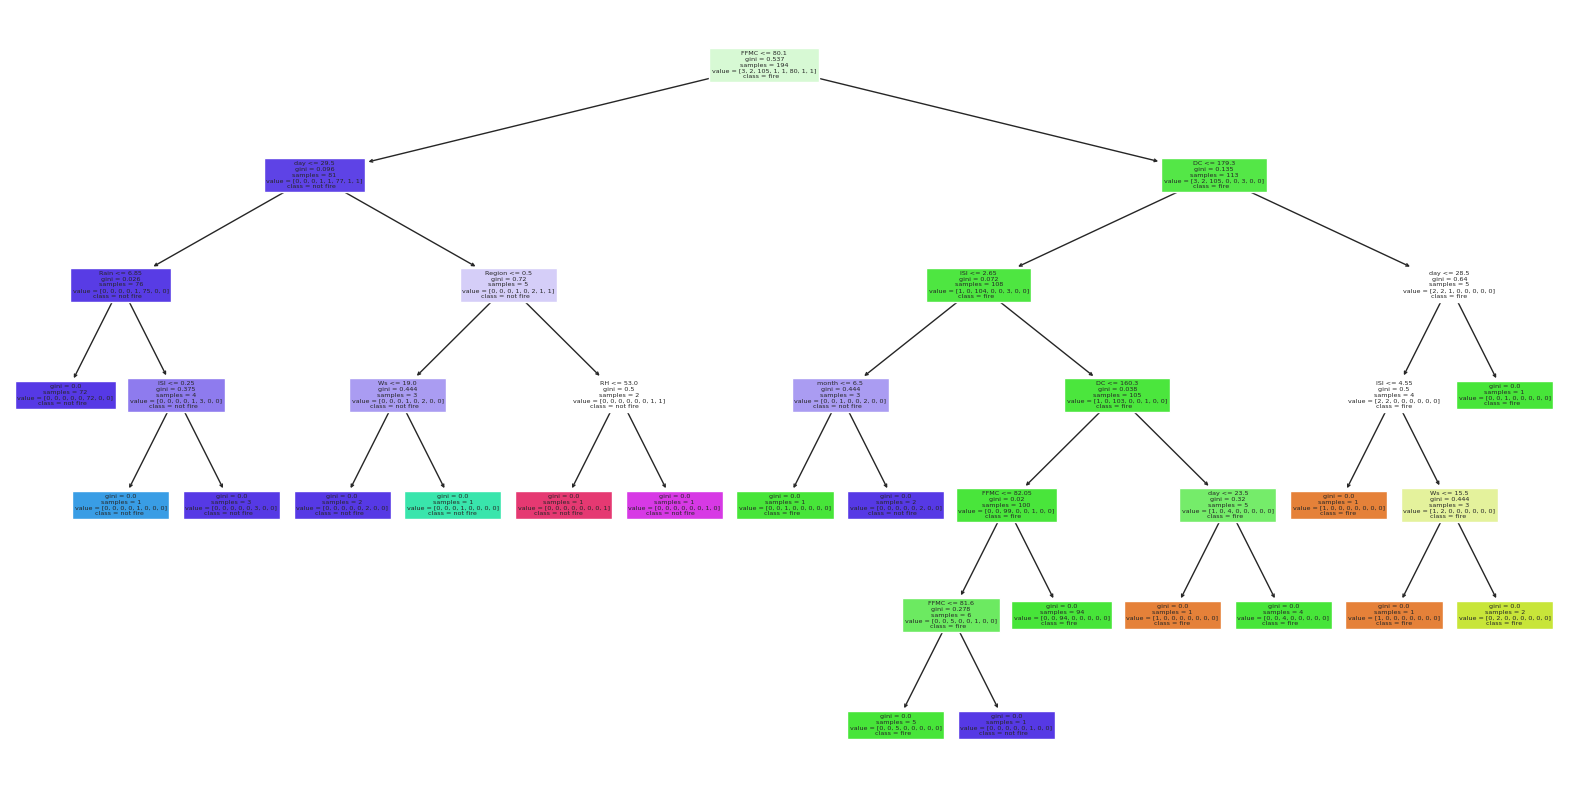

In [84]:
X = data[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']]
y = data['Classes']  # Assuming 'Classes' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier

# Step 5: Build Decision Tree Model
model = DecisionTreeClassifier()

# Step 6: Train Model
model.fit(X_train, y_train)

# Step 7: Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 8: Visualize Tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()